<h1><center> KNN MODEL



In [34]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
#Load the dataset and display the first few rows
status_data = pd.read_csv("mypersonality_cleaned.csv")
status_data.head()

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY,Unnamed: 25,Unnamed: 26
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.1,NaN,NaN


In [36]:
#Drop unnecessary columns
status_data = status_data.drop(['Unnamed: 25'], axis=1)
status_data = status_data.drop(['Unnamed: 26'], axis=1)
status_data

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.1
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,n,y,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.1
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,n,y,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.1
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.1
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,n,y,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,10008,NaN,thing give away,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10009,10009,NaN,wishing saturday,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10010,10010,NaN,studying hard,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10011,10011,NaN,head,0.000,0.000,0.000,0.0000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Initialize lists and define the summarize_metrics function
p = []
r = []
a = []
f= []
b = []

def summarize_metrics(tp, tn, fp, fn):
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    f1_score = (2 * recall * precision) / (recall + precision)
    balanced_accuracy = ((tp/(tp+fn)) + (tn/(tn+fp))) / 2

    p.append(precision)
    r.append(recall)
    a.append(accuracy)
    f.append(f1_score)
    b.append(balanced_accuracy)
    print("Balanced accuracy: ",balanced_accuracy)
    print("Precison:", precision)
    print("Recall:", recall)
    print("Accuracy:", accuracy)
    print("F1 score:", f1_score)

    return p,r,a,f

In [38]:
#Drop rows with missing values and display the resulting DataFrame
status_data = status_data.dropna()
status_data

,Unnamed: 0,#AUTHID,STATUS,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,sEXT,sNEU,sAGR,...,cCON,cOPN,DATE,NETWORKSIZE,BETWEENNESS,NBETWEENNESS,DENSITY,BROKERAGE,NBROKERAGE,TRANSITIVITY
0,0,b7b7764cfa1c523e4e93ab2a79a946c4,like sound thunder,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/19/2009 15:21,180,14861.6,93.29,0.03,15661.0,0.49,0.10
1,1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats sleep,0.000,0.420,0.580,0.4404,2.65,3,3.15,...,n,y,7/2/2009 8:41,180,14861.6,93.29,0.03,15661.0,0.49,0.10
2,2,b7b7764cfa1c523e4e93ab2a79a946c4,sore knot muscle base neck stop hurting hand y...,0.319,0.466,0.216,0.6597,2.65,3,3.15,...,n,y,6/15/2009 13:15,180,14861.6,93.29,0.03,15661.0,0.49,0.10
3,3,b7b7764cfa1c523e4e93ab2a79a946c4,like sound song,0.000,0.556,0.444,0.3612,2.65,3,3.15,...,n,y,6/22/2009 4:48,180,14861.6,93.29,0.03,15661.0,0.49,0.10
4,4,b7b7764cfa1c523e4e93ab2a79a946c4,home love,0.000,0.808,0.192,0.6369,2.65,3,3.15,...,n,y,7/20/2009 2:31,180,14861.6,93.29,0.03,15661.0,0.49,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9912,9912,deb899e426c1a5c66c24eeb0d7df6257,found chinese year valentines day make two hol...,0.355,0.088,0.558,-0.7717,2.15,2.15,4.1,...,n,y,1/28/2010 11:48,36,185.71,31.21,0.40,377.0,0.32,0.63
9913,9913,ea28a927cb6663480ea33ca917c3c8ba,picture mine old,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/2/2010 20:08,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9914,9914,ea28a927cb6663480ea33ca917c3c8ba,filthy swine,0.000,0.000,1.000,0.0000,4.05,3.35,3.8,...,y,y,2/9/2010 20:04,83,2935.76,88.40,0.08,3120.0,0.47,0.26
9915,9915,5532642937eb3497a43e15dbb23a9d2d,propnames b rip,0.315,0.000,0.685,-0.5574,1.4,4.05,3.3,...,n,y,2/10/2010 2:01,154,11424.5,98.25,0.02,11510.0,0.49,0.05


In [39]:
status_data = status_data.drop(['STATUS', '#AUTHID', 'sEXT', 'sNEU', 'sAGR',
                                    'sCON', 'sOPN', 'DATE'], axis=1)

In [40]:
status_data = status_data.drop(['BROKERAGE', 'BETWEENNESS', 'NBROKERAGE',
                                    'NBETWEENNESS', 'DENSITY', 'TRANSITIVITY', 'NETWORKSIZE'], axis=1)


In [41]:
status_data

,Unnamed: 0,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [42]:
#Renaming First column
new_columns = status_data.columns.values
new_columns[0] = "rowID"
status_data.columns = new_columns

In [43]:
#Retrieve and Reorder Columns:
cols = status_data.columns.tolist()
cols = cols[:5] + cols[5:10]
#Subset DataFrame Based on Reordered Columns:
status_data = status_data[cols]
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [44]:
#identifying whether there are any missing values and extracting rows that contain these missing values for further examination or processing.
status_data.isnull().values.any()
status_data[status_data.isna().any(axis=1)]

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN


In [45]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,n,y,n,n,y
1,1,0.000,0.420,0.580,0.4404,n,y,n,n,y
2,2,0.319,0.466,0.216,0.6597,n,y,n,n,y
3,3,0.000,0.556,0.444,0.3612,n,y,n,n,y
4,4,0.000,0.808,0.192,0.6369,n,y,n,n,y
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,n,n,y,n,y
9913,9913,0.000,0.000,1.000,0.0000,y,y,y,y,y
9914,9914,0.000,0.000,1.000,0.0000,y,y,y,y,y
9915,9915,0.315,0.000,0.685,-0.5574,n,y,n,n,y


In [46]:
#converting categorical data (like 'y' and 'n') into numerical form suitable for further analysis or modeling.
features = ['cEXT', 'cNEU', 'cOPN', 'cAGR', 'cCON']
for feature in features:
  status_data[feature] = status_data[feature].map({'y': 1.0, 'n': 0.0}).fillna(0).astype(int)

In [47]:
print(status_data.shape)

(9856, 10)


In [48]:
status_data

,rowID,sentiNEG,sentiPOS,sentiNEU,sentiCOMPOUND,cEXT,cNEU,cAGR,cCON,cOPN
0,0,0.000,0.556,0.444,0.3612,0,1,0,0,1
1,1,0.000,0.420,0.580,0.4404,0,1,0,0,1
2,2,0.319,0.466,0.216,0.6597,0,1,0,0,1
3,3,0.000,0.556,0.444,0.3612,0,1,0,0,1
4,4,0.000,0.808,0.192,0.6369,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
9912,9912,0.355,0.088,0.558,-0.7717,0,0,1,0,1
9913,9913,0.000,0.000,1.000,0.0000,1,1,1,1,1
9914,9914,0.000,0.000,1.000,0.0000,1,1,1,1,1
9915,9915,0.315,0.000,0.685,-0.5574,0,1,0,0,1


In [49]:
#split the status_data DataFrame into two separate sets: a training set (train_data) and a test set (test_data)
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(status_data, test_size=0.50,random_state=42)

In [50]:
train = train_data.values
test = test_data.values

**Applying K-Nearest-NeighborsClassifier model**
Imports the KNeighborsClassifier class from scikit-learn, which implements the K-nearest neighbors classification algorithm. K-nearest neighbors is a non-parametric method used for classification based on the majority class among its nearest neighbors.

In [51]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=250)
model = model.fit(train[0:, 1:5], train[0:, 7])

In [52]:
# predicts the values of the "cOPN" column using the trained model (model) on the test data
output = model.predict(test[:, 1:5])
rowID = [TEST.rowID for TEST in test_data.itertuples()]
result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})

In [53]:
 # Build the confusion matrix to assess the model
tp_count = 0
tn_count = 0
fp_count = 0
fn_count = 0
for row in rowID:
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
  if test_cEXT_val == 1:
    if result_cEXT_val == 1:
        tp_count += 1
    else:
        fn_count += 1
  else:
    if result_cEXT_val == 1:
        fp_count += 1
    else:
        tn_count += 1


<ipython-input-53-c0b7aab48b93>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-53-c0b7aab48b93>:8: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


3449 98 1119 262


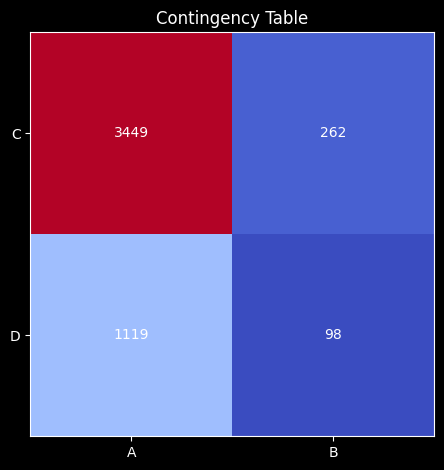

In [55]:
#illustrating counts of true positives, true negatives, false positives, and false negatives in a classification context.
print(tp_count, tn_count, fp_count, fn_count)


data = np.array([[tp_count, fn_count ], [fp_count, tn_count ]])

fig, ax = plt.subplots()
im = ax.imshow(data, cmap='coolwarm')

ax.set_xticks(np.arange(len(['A', 'B'])))
ax.set_yticks(np.arange(len(['C', 'D'])))

ax.set_xticklabels(['A', 'B'])
ax.set_yticklabels(['C', 'D'])

for i in range(len(['A', 'B'])):
    for j in range(len(['C', 'D'])):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Contingency Table")
fig.tight_layout()
plt.show()

In [56]:

#after adding random state
summarize_metrics(tp_count, tn_count, fp_count, fn_count)

Balanced accuracy:  0.5049624835622714
Precison: 0.7550350262697023
Recall: 0.9293990838049043
Accuracy: 0.7197646103896104
F1 score: 0.8331924145428191


([0.7550350262697023],
 [0.9293990838049043],
 [0.7197646103896104],
 [0.8331924145428191])

Performing repeated K-Nearest-Neighbor modeling and evaluation across different test sizes, aiming to visualize the performance metrics (true positives, true negatives, false positives, false negatives) for predicting "cOPN" values based on social metrics in the dataset.

In [57]:
#visualizing Social metrics at different test size and sample size

test_size = [0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95]

for i in test_size :
    train_data, test_data = train_test_split(status_data, test_size=i,random_state=42)
    train = train_data.values
    test = test_data.values
    Kmodel =KNeighborsClassifier(n_neighbors=250)
    model = Kmodel.fit(train[0:,1:5],train[0:,7])
    output = model.predict(test[:, 1:5])
    rowID = [TEST.rowID for TEST in test_data.itertuples()]
    result_df = pd.DataFrame({"rowID": rowID,
                                  "cOPN": list(output)})
    tp_count = 0
    tn_count = 0
    fp_count = 0
    fn_count = 0
    for row in rowID:
      test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
      result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)
      if test_cEXT_val == 1:
        if result_cEXT_val == 1:
            tp_count += 1
        else:
            fn_count += 1
      else:
        if result_cEXT_val == 1:
            fp_count += 1
        else:
            tn_count += 1

    x = summarize_metrics(tp_count, tn_count, fp_count, fn_count)


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5026907667337112
Precison: 0.7445175438596491
Recall: 0.9263301500682128
Accuracy: 0.7089249492900609
F1 score: 0.825531914893617


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5026874214714505
Precison: 0.7461928934010152
Recall: 0.9337568058076225
Accuracy: 0.7139959432048681
F1 score: 0.8295042321644498


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4916457686826624
Precison: 0.7414928649835346
Recall: 0.9196732471068755
Accuracy: 0.7013184584178499
F1 score: 0.8210270434518385


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.48803992323787165
Precison: 0.7398160315374507
Recall: 0.9204359673024524
Accuracy: 0.6996753246753247
F1 score: 0.8203011170471103


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4946190537421089
Precison: 0.749271137026239
Recall: 0.9252925292529253
Accuracy: 0.7111937774771728
F1 score: 0.8280306081353201


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5000313780898453
Precison: 0.7501577287066246
Recall: 0.9188562596599691
Accuracy: 0.7095652173913043
F1 score: 0.825981243487322


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5034889080303442
Precison: 0.7518755209780494
Recall: 0.9144981412639405
Accuracy: 0.7093583565812833
F1 score: 0.8252516010978957


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.504291475910181
Precison: 0.7537963654468509
Recall: 0.907673860911271
Accuracy: 0.707619477006312
F1 score: 0.823609411124711


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5049624835622714
Precison: 0.7550350262697023
Recall: 0.9293990838049043
Accuracy: 0.7197646103896104
F1 score: 0.8331924145428191


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4993509780230546
Precison: 0.749593165174939
Recall: 0.906519065190652
Accuracy: 0.7028223574986165
F1 score: 0.8206213116579446


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4997273235504757
Precison: 0.7492941840767928
Recall: 0.8982400722021661
Accuracy: 0.6985120054108894
F1 score: 0.8170343766033865


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49455252968524666
Precison: 0.7453111305872042
Recall: 0.8876826722338205
Accuracy: 0.6892461370376151
F1 score: 0.8102906145783706


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49570823426960997
Precison: 0.7434397723680051
Recall: 0.9146246596654998
Accuracy: 0.7011594202898551
F1 score: 0.8201953261248691


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.4913551447897365
Precison: 0.7397119341563786
Recall: 0.5215814290895902
Accuracy: 0.5062229437229437
F1 score: 0.6117847266539035


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49563507254546446
Precison: 0.739493847225447
Recall: 0.5439795046968403
Accuracy: 0.5190868738110336
F1 score: 0.6268451092304664


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49546126694093784
Precison: 0.742631296891747
Recall: 0.8885860852837448
Accuracy: 0.6877536404869897
F1 score: 0.8090789665742227


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.49991528582675054
Precison: 0.7424994360478231
Recall: 0.9993927432822226
Accuracy: 0.74219366475031
F1 score: 0.8520028473435579


<ipython-input-57-a83f963d7b15>:20: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  test_cEXT_val = int(test_data.loc[test_data['rowID'] == row].cOPN)
<ipython-input-57-a83f963d7b15>:21: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result_cEXT_val = int(result_df.loc[result_df['rowID'] == row].cOPN)


Balanced accuracy:  0.5
Precison: 0.7422041862451944
Recall: 1.0
Accuracy: 0.7422041862451944
F1 score: 0.8520289322054676


In [58]:
#value deleter
#delete the first element from each of the lists p, r, a, f, and b
p.pop(0)
r.pop(0)
a.pop(0)
f.pop(0)
b.pop(0)

0.5049624835622714

In [59]:
print(b)
print(len(b))

[0.5026907667337112, 0.5026874214714505, 0.4916457686826624, 0.48803992323787165, 0.4946190537421089, 0.5000313780898453, 0.5034889080303442, 0.504291475910181, 0.5049624835622714, 0.4993509780230546, 0.4997273235504757, 0.49455252968524666, 0.49570823426960997, 0.4913551447897365, 0.49563507254546446, 0.49546126694093784, 0.49991528582675054, 0.5]
18


**Plot against Accuracy Scores**

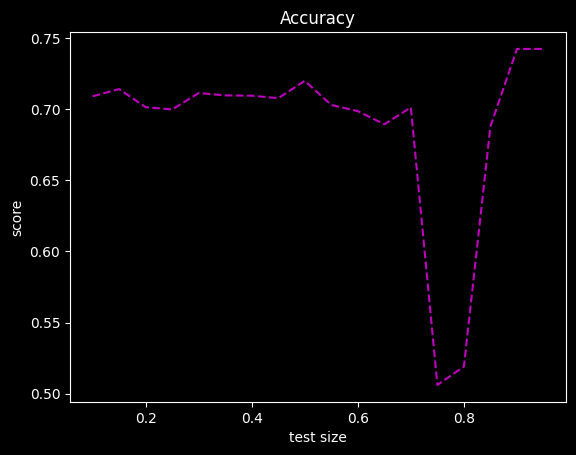

In [60]:
import matplotlib.pyplot as plt


plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Accuracy")
plt.plot(test_size,a,'m--')

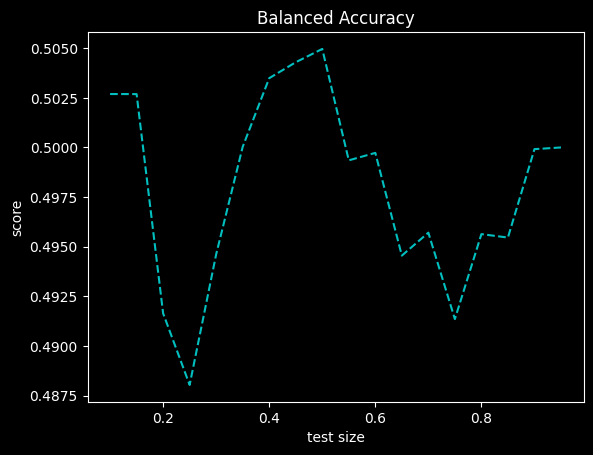

In [62]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Balanced Accuracy")
plt.plot(test_size,b,'c--')

**Plot against Recall Scores**

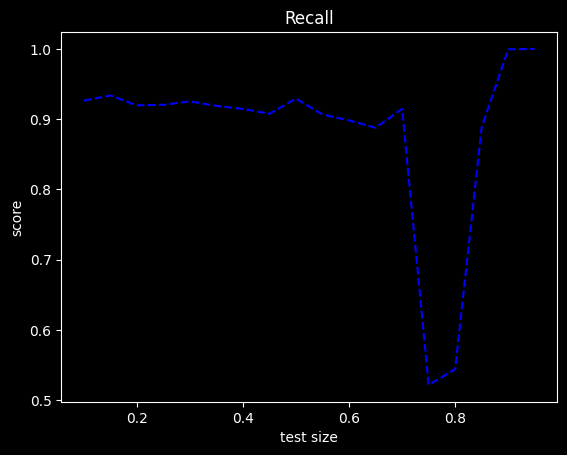

In [63]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Recall")
plt.plot(test_size,r,'b--')

**Plot against Precision Scores**

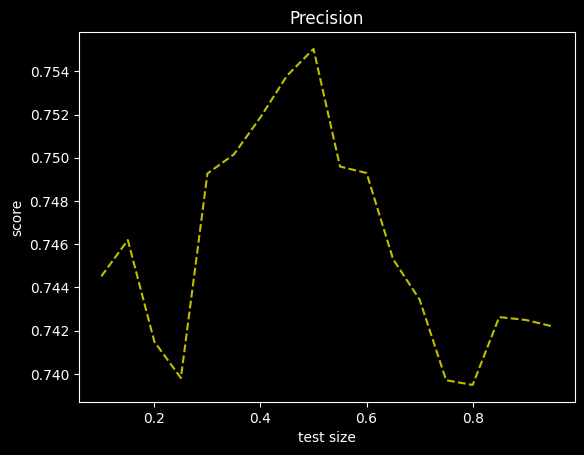

In [64]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("Precision")
plt.plot(test_size,p,'y--')

**Plot against F1 Scores**

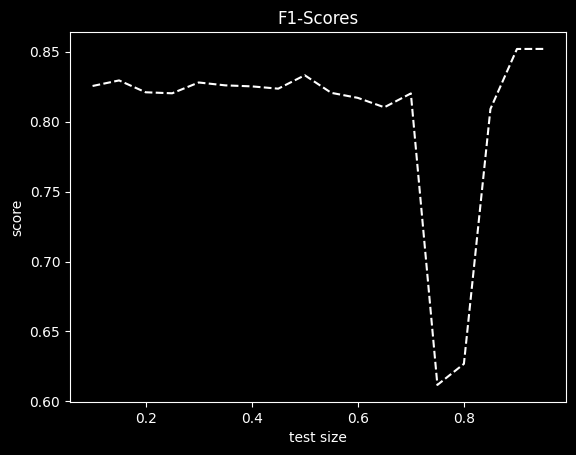

In [65]:
plt.style.use("dark_background")
plt.xlabel("test size")
plt.ylabel("score")
plt.title("F1-Scores")
plt.plot(test_size,f,'w--')